In [2]:
import pandas as pd



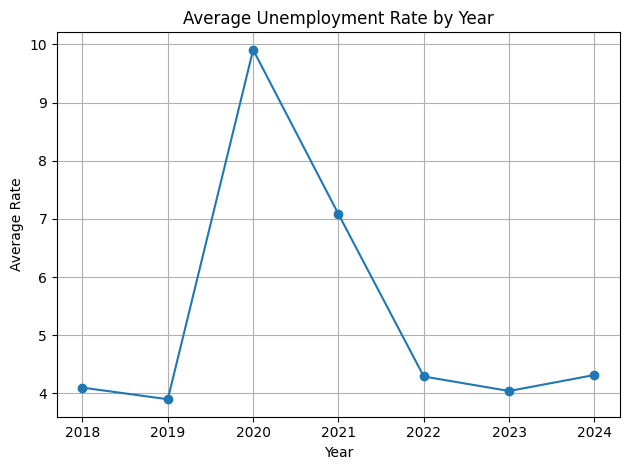

In [8]:
# import unemployment data for New York, state wide, seasonally adjusted
data = {'Year': [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Jan': [4.5, 4.0, 4.1, 8.6, 5.2, 4.0, 4.2],
    'Feb': [4.4, 3.9, 4.2, 8.4, 4.8, 4.0, 4.1],
    'Mar': [4.3, 3.9, 4.2, 8.1, 4.6, 4.0, 4.2],
    'Apr': [4.2, 3.8, 15.7, 7.9, 4.5, 3.9, 4.2],
    'May': [4.1, 3.8, 16.7, 7.5, 4.3, 3.9, 4.3],
    'Jun': [4.0, 3.8, 13.6, 7.5, 4.2, 3.9, 4.4],
    'Jul': [3.9, 3.8, 12.6, 7.1, 4.0, 4.0, 4.4],
    'Aug': [3.9, 3.9, 10.8, 6.8, 3.8, 4.1, 4.4],
    'Sep': [3.9, 3.9, 10.2, 6.2, 3.9, 4.1, 4.4],
    'Oct': [4.0, 4.0, 9.2, 5.9, 4.0, 4.2, 4.4],
    'Nov': [4.0, 4.0, 8.9, 5.6, 4.1, 4.2, 4.4],
    'Dec': [4.0, 4.0, 8.7, 5.4, 4.1, 4.2, 4.4]}

df = pd.DataFrame(data)
long_df = df.melt(id_vars='Year', var_name='Month', value_name='Rate')
import matplotlib.pyplot as plt

long_df.groupby('Year')['Rate'].mean().plot(kind='line', marker='o')
plt.title('Average Unemployment Rate by Year')
plt.ylabel('Average Rate')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


## go-stay proportion > 0.5 growing 
growing (occupany proportions, go-stay , percent change per quarter of leases, unemployment rate, GDP?)
anova output occupany rate 
chi square growing or not per industry